## Load data.

In [1]:
import numpy as np
import os
import csv
import pickle
import matplotlib as mpl

from helper_functions import plot_scatter_and_fit, print_stats, plot_overview_2_subplots, plot_effects_2_subplots
from prepare_plot_data import get_sample_size_department

CWD = os.path.abspath("")  # Jupyter notebook path.
dir_dict = os.path.join(CWD, "dicts")  # Data to plot.
dir_output = os.path.join(CWD, "output")  # Folder to put figures in.
dir_npy = os.path.join(CWD, "npy")  # Data files needed for plotting figures.

# Set up plotting parameters.
font_kw = {"family": "arial", "weight": "normal", "size": "7"}  # Markers and such.
mpl.rc("font", **font_kw)

# Load data to plot.
USE_CAPS = True  # Capitalize department names.
BY = "Department"  # Used in figure file names.

with open(os.path.join(dir_dict, "department2synthesis.pkl"), "rb") as f:
    department2synthesis = pickle.load(f)
with open(os.path.join(dir_dict, "department2benchwork.pkl"), "rb") as f:
    department2benchwork = pickle.load(f)
with open(os.path.join(dir_dict, "department2men_ratio.pkl"), "rb") as f:
    department2men_ratio = pickle.load(f)
with open(os.path.join(dir_dict, "department2brilliance.pkl"), "rb") as f:
    department2brilliance = pickle.load(f)

ratio_mat_rel = np.load(os.path.join(dir_npy, "ratio_mat_rel-department_effect.npy"))
departments_select = np.load(os.path.join(dir_npy, "groups-department_effect.npy"))
n_collab = get_sample_size_department(dir_dict)

## Make figures.

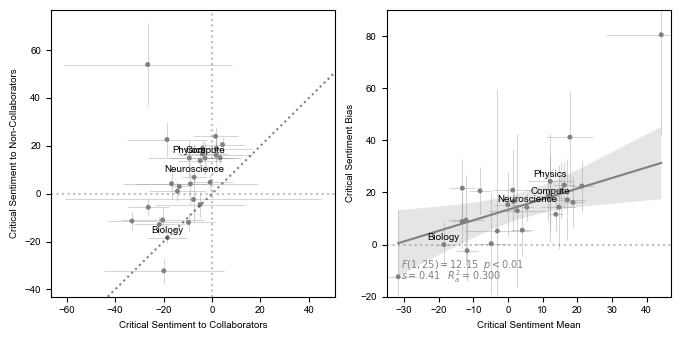

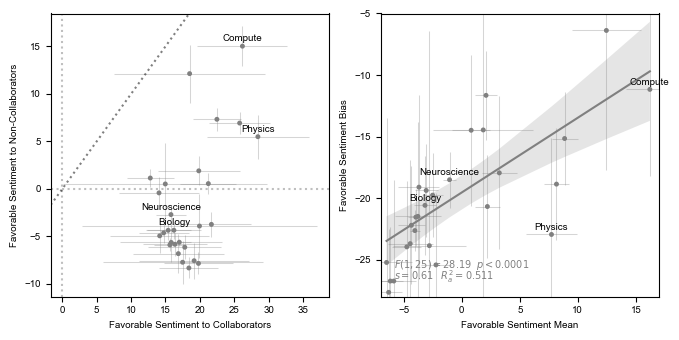

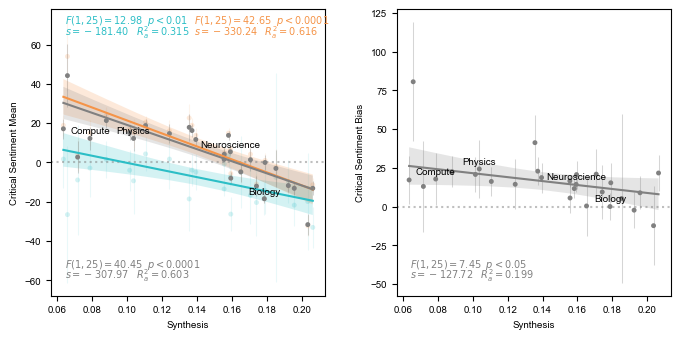

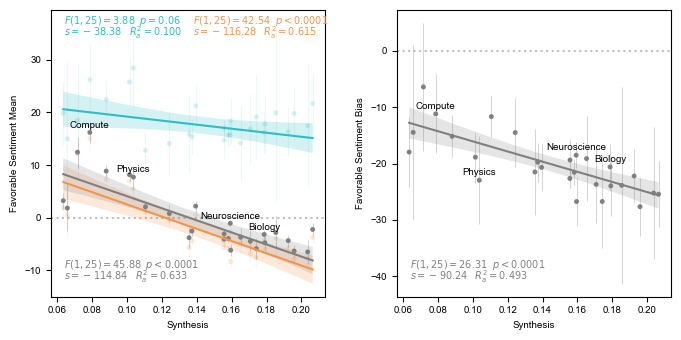

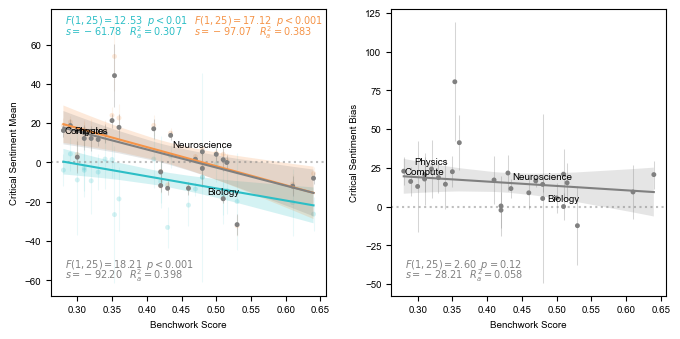

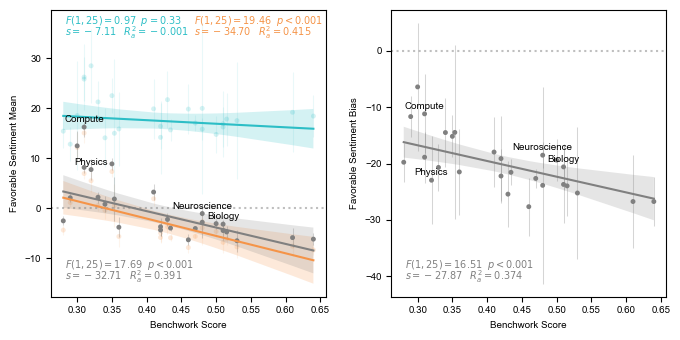

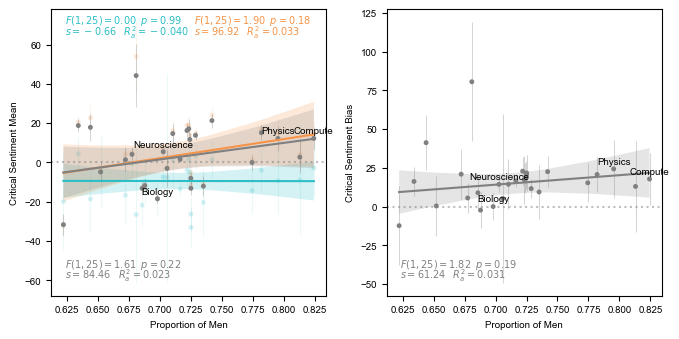

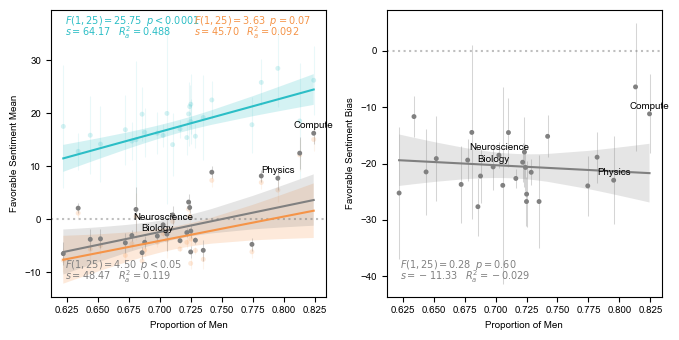

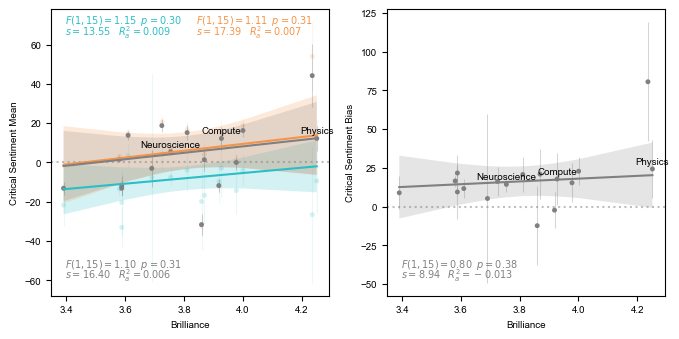

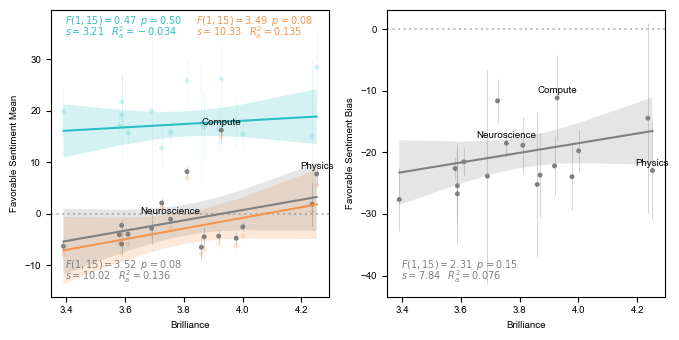

In [2]:
alpha_err = 0.33

# Groups to annotate on figures.
# grps_subset = np.array([k for k, v in n_collab.items() if v >= 1500])
grps_subset = ["biology", "neuroscience", "physics", "compute"]

xlims = [None, [-35, 47]]
ylims = [None, [-20, 90]]
# xlims, ylims = None, None
plot_overview_2_subplots(
    ratio_mat_rel, departments_select, grps_subset, dir_output, xlims, ylims, sent=-1, caps=USE_CAPS, alpha_err=alpha_err, by=BY
)  # Plot critical sentiment.

xlims = [None, [-7, 17]]
ylims = [None, [-28, -5]]
# xlims, ylims = None, None
plot_overview_2_subplots(
    ratio_mat_rel, departments_select, grps_subset, dir_output, xlims, ylims, sent=1, caps=USE_CAPS, alpha_err=alpha_err, by=BY
)  # Plot favorable sentiment.

x_factor = np.array([department2synthesis[c] for c in departments_select])
x_lab = "Synthesis"
ylims = [[-50, 60], [-10, 85]]
ylims = None
plot_effects_2_subplots(
    ratio_mat_rel, departments_select, grps_subset, x_factor, x_lab, dir_output, ylims, sent=-1, caps=USE_CAPS, alpha_err=alpha_err, by=BY
)  # Plot critical sentiment.

x_factor = np.array([department2synthesis[c] for c in departments_select])
x_lab = "Synthesis"
ylims = [[-10, 50], [-50, 0]]
ylims = None
plot_effects_2_subplots(
    ratio_mat_rel, departments_select, grps_subset, x_factor, x_lab, dir_output, ylims, sent=1, caps=USE_CAPS, alpha_err=alpha_err, by=BY
)  # Plot favorable sentiment.

x_factor = np.array([department2benchwork[c] for c in departments_select])
x_lab = "Benchwork Score"
ylims = [[-50, 60], [-10, 85]]
ylims = None
plot_effects_2_subplots(
    ratio_mat_rel, departments_select, grps_subset, x_factor, x_lab, dir_output, ylims, sent=-1, caps=USE_CAPS, alpha_err=alpha_err, by=BY
)  # Plot critical sentiment.

x_factor = np.array([department2benchwork[c] for c in departments_select])
x_lab = "Benchwork Score"
ylims = [[-10, 50], [-50, 0]]
ylims = None
plot_effects_2_subplots(
    ratio_mat_rel, departments_select, grps_subset, x_factor, x_lab, dir_output, ylims, sent=1, caps=USE_CAPS, alpha_err=alpha_err, by=BY
)  # Plot favorable sentiment.

x_factor = np.array([department2men_ratio[c] for c in departments_select])
x_lab = "Proportion of Men"
ylims = [[-50, 60], [-10, 85]]
ylims = None
plot_effects_2_subplots(
    ratio_mat_rel, departments_select, grps_subset, x_factor, x_lab, dir_output, ylims, sent=-1, caps=USE_CAPS, alpha_err=alpha_err, by=BY
)  # Plot critical sentiment.

x_factor = np.array([department2men_ratio[c] for c in departments_select])
x_lab = "Proportion of Men"
ylims = [[-50, 60], [-10, 85]]
ylims = None
plot_effects_2_subplots(
    ratio_mat_rel, departments_select, grps_subset, x_factor, x_lab, dir_output, ylims, sent=1, caps=USE_CAPS, alpha_err=alpha_err, by=BY
)  # Plot favorable sentiment.

x_factor = np.array([department2brilliance[c] for c in departments_select])
mask_ = ~np.isnan(x_factor)
x_lab = "Brilliance"
ylims = [[-50, 60], [-10, 85]]
ylims = None
plot_effects_2_subplots(
    ratio_mat_rel[:, mask_, ...],
    departments_select[mask_],
    grps_subset,
    x_factor[mask_],
    x_lab,
    dir_output,
    ylims,
    sent=-1,
    caps=USE_CAPS,
    alpha_err=alpha_err,
    by=BY,
)  # Plot critical sentiment.

x_factor = np.array([department2brilliance[c] for c in departments_select])
mask_ = ~np.isnan(x_factor)
x_lab = "Brilliance"
ylims = [[-50, 60], [-10, 85]]
ylims = None
plot_effects_2_subplots(
    ratio_mat_rel[:, mask_, ...],
    departments_select[mask_],
    grps_subset,
    x_factor[mask_],
    x_lab,
    dir_output,
    ylims,
    sent=1,
    caps=USE_CAPS,
    alpha_err=alpha_err,
    by=BY,
)  # Plot favorable sentiment.

### For more statistics, run below.

In [3]:
from tabulate import tabulate


# Available formats: https://pypi.org/project/tabulate/#:~:text=M%20%2019%0A%2D%20%20%2D%20%20%2D%2D-,Table%20format,-There%20is%20more
tablefmt = "psql"  # Looks nice here.
tablefmt = "plain"

df = print_stats(ratio_mat_rel, departments_select, None, None, sent=-1)
print(tabulate(df, headers="keys", tablefmt=tablefmt))
df = print_stats(ratio_mat_rel, departments_select, None, None, sent=1)
print(tabulate(df, headers="firstrow", tablefmt=tablefmt))


x_factor = np.array([department2benchwork[c] for c in departments_select])
xlab = "Benchwork Score"
df = print_stats(ratio_mat_rel, departments_select, x_factor, xlab, sent=-1)
print(tabulate(df, headers="firstrow", tablefmt=tablefmt))
df = print_stats(ratio_mat_rel, departments_select, x_factor, xlab, sent=1)
print(tabulate(df, headers="firstrow", tablefmt=tablefmt))


x_factor = np.array([department2synthesis[c] for c in departments_select])
xlab = "Synthesis"
df = print_stats(ratio_mat_rel, departments_select, x_factor, xlab, sent=-1)
print(tabulate(df, headers="firstrow", tablefmt=tablefmt))
df = print_stats(ratio_mat_rel, departments_select, x_factor, xlab, sent=1)
print(tabulate(df, headers="firstrow", tablefmt=tablefmt))


x_factor = np.array([department2men_ratio[c] for c in departments_select])
xlab = "Proportion of Men"
df = print_stats(ratio_mat_rel, departments_select, x_factor, xlab, sent=-1)
print(tabulate(df, headers="firstrow", tablefmt=tablefmt))
df = print_stats(ratio_mat_rel, departments_select, x_factor, xlab, sent=1)
print(tabulate(df, headers="firstrow", tablefmt=tablefmt))


x_factor = np.array([department2brilliance[c] for c in departments_select])
mask_ = ~np.isnan(x_factor)
xlab = "Brilliance"
df = print_stats(ratio_mat_rel[:, mask_, ...], departments_select[mask_], x_factor[mask_], xlab, sent=-1)
print(tabulate(df, headers="firstrow", tablefmt=tablefmt))
df = print_stats(ratio_mat_rel[:, mask_, ...], departments_select[mask_], x_factor[mask_], xlab, sent=1)
print(tabulate(df, headers="firstrow", tablefmt=tablefmt))

    Type                      Slope  95% CI         Adjusted R-squared  F-test Statistic    F-test p-value      Spearman Correlation  Spearman p-value
 0  Critical Bias vs. Mean     0.41  [0.17,0.65]                   0.3  F(1,25)=12.15       <0.01                               0.64  <0.001
0    Favorable Bias vs. Mean    0.61    [0.37,0.84]    0.511    F(1,25)=28.19    <0.0001    0.79    <0.0001
  0  Critical Mean (Collab) vs. Benchwork Score        -61.78  [-97.73,-25.84]      0.307  F(1,25)=12.53    <0.01      -0.53  <0.01
  1  Critical Mean (Non-Collab) vs. Benchwork Score    -97.07  [-145.39,-48.75]     0.383  F(1,25)=17.12    <0.001     -0.67  <0.001
  2  Critical Mean (All) vs. Benchwork Score           -92.2   [-136.70,-47.70]     0.398  F(1,25)=18.21    <0.001     -0.69  <0.0001
  3  Critical Bias vs. Benchwork Score                 -28.21  [-64.22,7.81]        0.058  F(1,25)=2.60     0.12       -0.45  <0.05
  0  Favorable Mean (Collab) vs. Benchwork Score        -7.11  [-22.0